<a href="https://colab.research.google.com/github/AadrikaJaiswal/Apna-Guide-Tasks/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample

In [ ]:
df = pd.read_csv('/content/Churn-Data.csv')
print(df.head())
print(df.info())
print(df.describe())

          cID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4223-BKEOR  Female              0      No        Yes      21          Yes   
1  6035-RIIOM  Female              0      No         No      54          Yes   
2  3797-VTIDR    Male              0     Yes         No       1           No   
3  2568-BRGYX    Male              0      No         No       4          Yes   
4  2775-SEFEE    Male              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL            Yes  ...              Yes   
1               Yes     Fiber optic             No  ...               No   
2  No phone service             DSL             No  ...               No   
3                No     Fiber optic             No  ...               No   
4               Yes             DSL            Yes  ...               No   

  TechSupport TV_Streaming Movie_Streaming        Contract Pap

In [ ]:
df = df.dropna()

In [ ]:
# Output unique values of the 'customer_type' column
unique_values = df['Contract'].unique()
print(unique_values)
unique_values = df['Method_Payment'].unique()
print(unique_values)
unique_values = df['InternetService'].unique()
print(unique_values)
unique_values = df['Charges_Month'].unique()
print(unique_values)

['One year' 'Two year' 'Month-to-month']
['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
['DSL' 'Fiber optic' 'No']
[64.85 97.2  23.45 ... 59.25 35.35 21.15]


In [ ]:
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TV_Streaming', 'Movie_Streaming', 'Contract', 'PaperlessBilling', 'Method_Payment'])

In [ ]:
# Convert "Yes" to 1 and "No" to 0 in the 'churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Display the first few rows to verify the changes
print(df.head())

          cID  SeniorCitizen  tenure  Charges_Month TotalCharges  Churn  \
0  4223-BKEOR              0      21          64.85       1336.8      0   
1  6035-RIIOM              0      54          97.20      5129.45      0   
2  3797-VTIDR              0       1          23.45        23.45      1   
3  2568-BRGYX              0       4          70.20       237.95      1   
4  2775-SEFEE              0       0          61.90                   0   

   gender_Female  gender_Male  Partner_No  Partner_Yes  ...  \
0           True        False        True        False  ...   
1           True        False        True        False  ...   
2          False         True       False         True  ...   
3          False         True        True        False  ...   
4          False         True        True        False  ...   

   Movie_Streaming_Yes  Contract_Month-to-month  Contract_One year  \
0                 True                    False               True   
1                 True        

In [ ]:
# Separate majority and minority classes
df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Churn.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
df = df.dropna()

This cell has errored code. But I've kept it still just for reference. The next cell contains the correct version of this cell's code

In [ ]:
# Split data into features and target variable
#seperate cID, features(X), target variable(y)
# cID= df_upsampled['cID']
# X = df_upsampled.drop(columns=['cID', 'Churn'])
# y = df_upsampled['Churn']

# # Identify non-numeric columns
# non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
# print(non_numeric_columns)

# # Handle non-numeric values
# for column in non_numeric_columns:
#     df[column] = pd.to_numeric(df[column], errors='coerce')
# # Drop rows with NaN values
# df.dropna(inplace=True)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df_upsampled.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_columns)

# Handle non-numeric values
for column in non_numeric_columns:
    df_upsampled[column] = pd.to_numeric(df[column], errors='coerce')
# Drop rows with NaN values
df.dropna(inplace=True)

# Split data into features and target variable
#seperate cID, features(X), target variable(y)
cID= df_upsampled['cID']
X = df_upsampled.drop(columns=['cID', 'Churn'])
y = df_upsampled['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

['cID', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'TV_Streaming_No', 'TV_Streaming_No internet service', 'TV_Streaming_Yes', 'Movie_Streaming_No', 'Movie_Streaming_No internet service', 'Movie_Streaming_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Method_Payment_Bank transfer (automatic)', 'Method_Payment_Credit card (automatic)', 'Method_Paymen

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
166/166 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5119 - val_loss: nan - val_accuracy: 0.4849
Epoch 2/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 3/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 4/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 5/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 6/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 7/50
166/166 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.4849
Epoch 8/50
166/166 [============================

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the testing data
# Assuming X_test is the input data
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)  # Convert to TensorFlow tensor

# Use the converted tensor for prediction
y_pred_probs = model.predict(X_test_tensor) # Get predicted probabilities for each class
y_pred_classes = y_pred_probs.argmax(axis=-1)  # Convert probabilities to predicted classes

# Assuming y_true and y_pred_classes are the actual and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

52/52 [==============================] - 0s 860us/step
Accuracy: 0.501207729468599
F1 Score: 0.0


In [ ]:
## Convert categorical columns to dummy variables
# df = pd.get_dummies(df, columns=['', 'category_column2'])

## Create new features if necessary
# df['total_usage'] = df['voice_usage'] + df['data_usage']


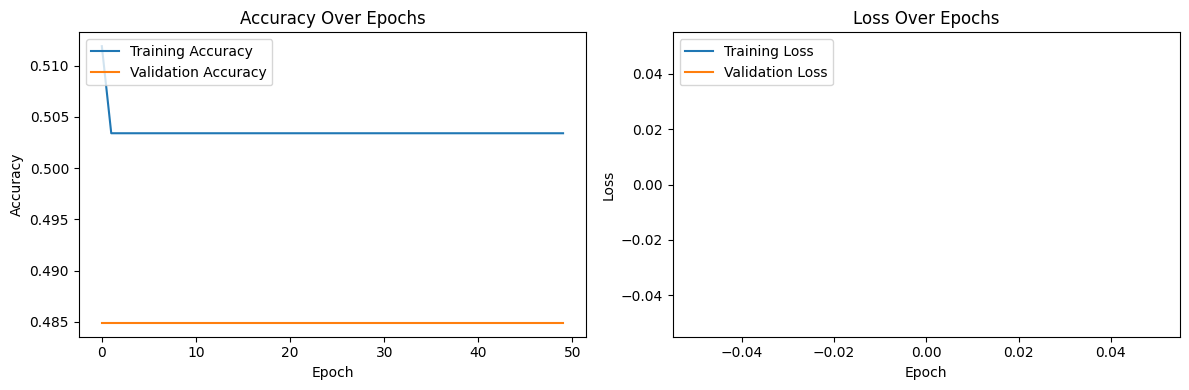

In [15]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy over epochs for training and validation sets
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')

# Plot loss over epochs for training and validation sets
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()
